In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls '/content/gdrive/My Drive/'


 16779402431328718780541502440530.jpg
 16779403981728433682610405185282.jpg
 1677941856280154629951810754458.jpg
 20220924_191332.jpg
 20220924_191419.jpg
 adobeResume.jpg
 archive
 bday20
 Classroom
'Colab Notebooks'
'Document from Harshitha.pdf'
'https:  images. (1).txt'
'https:  images. (2).txt'
'https:  images. (3).txt'
'https:  images..txt'
 icon.png
 IMG-20210822-WA0002.jpg
 IMG-20220226-WA0046.jpg
 IMG-20220409-WA0005.jpg
 IMG_20221031_113702.jpg
 IMG_20221031_114042.jpg
 IMG_20221031_114045.jpg
 IMG_20221031_114205.jpg
 IMG_20221031_114409.jpg
 IMG_20221031_114419.jpg
 IMG_20221031_114432.jpg
 IMG_20221031_114436.jpg
 IMG_20221031_114439.jpg
 IMG_20221031_114529.jpg
 IMG_20221031_114541.jpg
 IMG_20221031_114545.jpg
 IMG_20221031_114637.jpg
 IMG_20221031_114639.jpg
 IMG_20221031_114647.jpg
 IMG_20221031_114654.jpg
 IMG_20221031_114659.jpg
 IMG_20221031_114709.jpg
 IMG_20221031_114711.jpg
 IMG_20221031_114719.jpg
 IMG_20221031_114740.jpg
 IMG_20221031_114744.jpg
'Introduction to 

In [ ]:
# #to extract zipfile
# import zipfile
# import os

# # Set the path to the zip file
# zip_file = "/content/archive.zip"

# # Set the path to the directory where you want to extract the contents
# extract_dir = "/content/braintumor"

# # Open the zip file for reading
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    
#     # Extract all the files to the specified directory
#     zip_ref.extractall(extract_dir)
    
# # Print the list of files in the extracted directory
# print(os.listdir(extract_dir))

FileNotFoundError: ignored

In [1]:
# #creating directory
# import os

# directory = "braintumor"

# try:
#     os.mkdir(directory)
#     print("Directory", directory, "created successfully!")
# except FileExistsError:
#     print("Directory", directory, "already exists.")

In [2]:
#allocating classes
path = os.listdir("/content/gdrive/MyDrive/archive/Training")
classes = {"notumor" : 0, "pituitary":1, "meningioma":2, "glioma":3}

NameError: name 'os' is not defined

In [ ]:
#to classify brain tumor images into different categories represented by the variable classes
x = []
y = []

for cls in classes:
    pth = "/content/gdrive/MyDrive/archive/Training/"+cls
    for i in os.listdir(pth):
        img = cv2.imread(pth+"/"+i, 0)
        img = cv2.resize(img, (200,200))
        x.append(img)
        y.append(classes[cls])

In [ ]:
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5719, 200, 200)
(5719,)


In [ ]:
np.unique(y)

array([0, 1, 2, 3])

In [ ]:
pd.Series(y).value_counts()

0    1602
1    1457
2    1339
3    1321
dtype: int64

In [ ]:
x.shape

(5719, 200, 200)

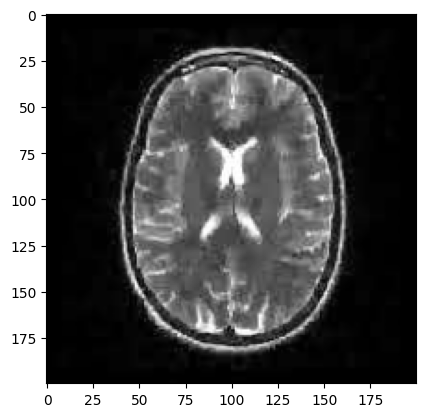

In [ ]:
plt.imshow(x[700], cmap = "gray")

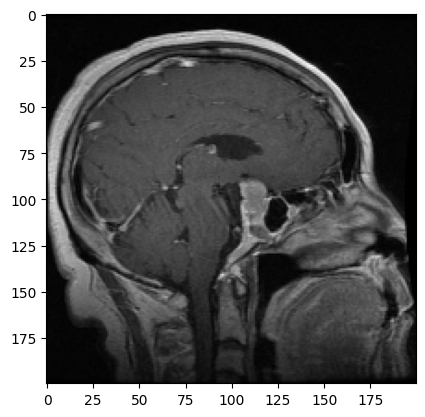

In [ ]:
plt.imshow(x[2500], cmap = "gray")

In [ ]:
#splitting the data into training and testing
x_update = x.reshape(len(x), -1)
x_train, x_test, y_train, y_test = train_test_split(x_update, y, test_size = 0.2, random_state=41)
x_train.shape,x_test.shape

((4575, 40000), (1144, 40000))

In [ ]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test=x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
#to reduce the dimensionality of high-dimensional data 
from sklearn.decomposition import PCA
pca = PCA(.98,random_state=0)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)
print(pca_train.shape, pca_test.shape)

(4575, 1813) (1144, 1813)


In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
log_reg = LogisticRegression(C=0.1)
log_reg.fit(pca_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
y_predicted = log_reg.predict(pca_test)
def plot_test_results(path):
    dec = {0:"No", 1:"Pituitary", 2: "Meningioma", 3:"Glioma"}
    plt.figure(figsize = (8,8))
    c = 1
    for i in os.listdir("/content/gdrive/MyDrive/archive/Testing/"+path)[:15]:
        plt.subplot(5, 5, c)

        img = cv2.imread("/content/gdrive/MyDrive/archive/Testing/"+path+i,0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1, -1)/255
        p = log_reg.predict(pca.transform(img1))
        plt.title(dec[p[0]])
        plt.imshow(img, cmap = "bone")
        plt.axis("off")
        c+=1

In [ ]:

# Load the dataset and labels
x = []
y = []
for cls in classes:
    pth = "/content/gdrive/MyDrive/archive/Training/" + cls
    for i in os.listdir(pth):
        img = cv2.imread(pth+"/"+i, 0)
        img = cv2.resize(img, (200,200))
        x.append(img.flatten())
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Train a logistic regression model
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

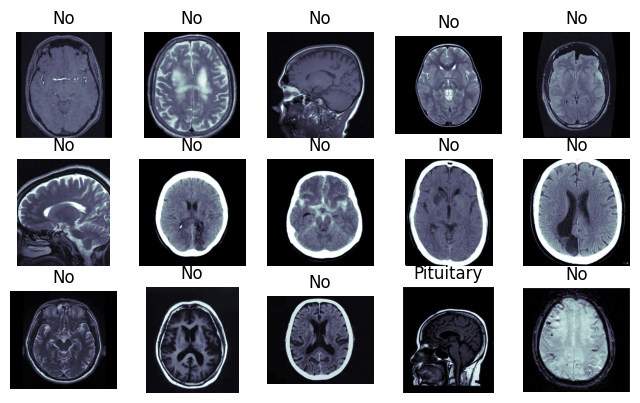

In [ ]:
plot_test_results("notumor/")

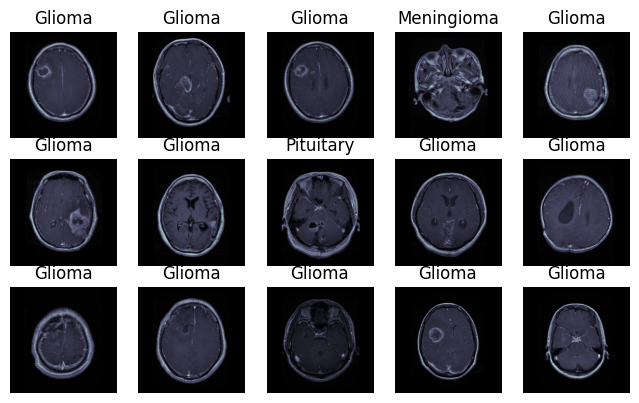

In [ ]:
plot_test_results("glioma/")

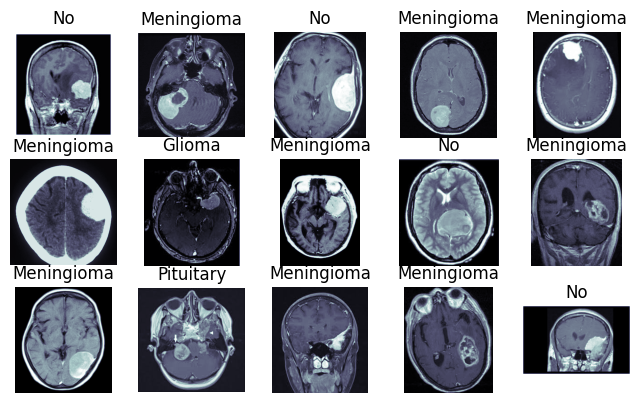

In [ ]:
plot_test_results("meningioma/")

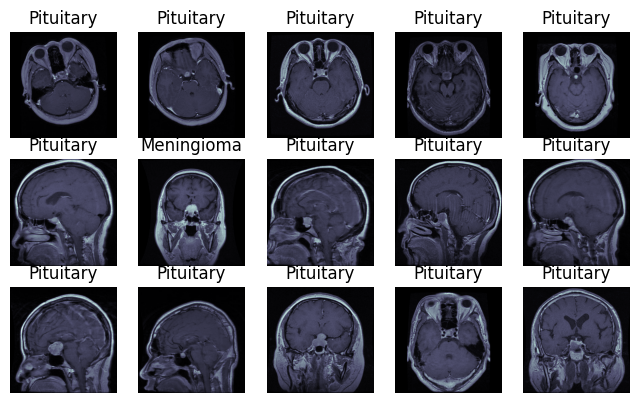

In [ ]:
plot_test_results("pituitary/")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
true_pos = np.diag(cm) 
precision = np.sum(true_pos / np.sum(cm, axis=0))
recall = np.sum(true_pos / np.sum(cm, axis=1))
f1_score = 2*((precision*recall)/(precision+recall))
# f1.append(f1_score)
print(f1_score)
print(cm)
print(accuracy_score(y_test, y_predicted))

3.3914252796120548
[[276   8  22   3]
 [  0 288  11   4]
 [ 19  18 199  38]
 [  2   7  37 212]]
0.8522727272727273


In [ ]:
print("Training score:", log_reg.score(pca_train, y_train))
print("Test score:", log_reg.score(pca_test, y_test))

Training score: 0.9973770491803279
Test score: 0.8522727272727273


In [ ]:
# Load an unlabeled image and preprocess it
img = cv2.imread("/content/gdrive/MyDrive/random images/norm.jpg", 0)
img = cv2.resize(img, (200,200))
img = img.flatten()

# Make a prediction on the image using the trained logistic regression model
prediction = model.predict([img])[0]

# Print the predicted class label
print(prediction)

0
